## No. 3	EDA (Max Point: 10)

-	Lakukanlah EDA sebagai dasar untuk cleansing dataset. (Output: Notebook)


In [1]:
# Import Dataset

import pandas as pd
import numpy as np

df_2018 = pd.read_csv('Crime2018.csv')
df_2019 = pd.read_csv('Crime2019.csv')
df_2020 = pd.read_csv('Crime2020.csv')

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Penggabungan Dataset

df = df_2018.append([df_2019, df_2020])
df.head()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


In [3]:
#Cek Baris dan Kolom

df.shape


(189564, 17)

In [4]:
# Cek Duplicate Data

print('Jumlah Data Duplikasi dalam Dataset:', df.duplicated(subset=None).sum())

Jumlah Data Duplikasi dalam Dataset: 161


In [5]:
# Buang data yang terduplikasi

df.drop_duplicates(inplace=True)


In [6]:
#Cek missing values

print('\nCounting total missing value:')
print(df.isnull().sum())



Counting total missing value:
INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     90676
OFFENSE_DESCRIPTION        0
DISTRICT                1037
REPORTING_AREA             0
SHOOTING               98408
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               90696
STREET                  1611
Lat                     6421
Long                    6421
Location                   0
dtype: int64


In [7]:
# Drop Kolom yang tidak digunakan

df.drop(['OFFENSE_CODE','OFFENSE_CODE_GROUP', 'SHOOTING','REPORTING_AREA','OCCURRED_ON_DATE', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'], axis = 1, inplace = True)

In [8]:
#Cek missing values

print('\nCounting total missing value:')
print(df.isnull().sum())



Counting total missing value:
INCIDENT_NUMBER           0
OFFENSE_DESCRIPTION       0
DISTRICT               1037
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
dtype: int64


In [9]:
# Cek Value di dalam District

df['DISTRICT'].value_counts()

B2          28885
C11         24321
D4          24299
B3          21444
A1          20461
C6          14387
D14         12231
E18         10869
E13         10705
E5           8635
A7           7699
A15          4110
External      320
Name: DISTRICT, dtype: int64

In [10]:
# Drop Value External dari kolom District

df = df[df.DISTRICT != 'External']

In [11]:
# Impute Data

from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='most_frequent')
df[['DISTRICT']] = impute.fit_transform(df[['DISTRICT']])

In [12]:
#checking missing value for each feature  

print('Checking missing value for each feature:')
print(df.isnull().sum())

Checking missing value for each feature:
INCIDENT_NUMBER        0
OFFENSE_DESCRIPTION    0
DISTRICT               0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
dtype: int64


In [13]:
# Cek tipe data masing masing kolom

df.dtypes

INCIDENT_NUMBER        object
OFFENSE_DESCRIPTION    object
DISTRICT               object
YEAR                    int64
MONTH                   int64
DAY_OF_WEEK            object
HOUR                    int64
dtype: object

## Hidden Insight

-	Jelaskan hidden insight yang kamu dapatkan dari hasil visualisasi di atas! (Output: Penjelasan)


### Analisis Waktu Rawan Kasus Kriminalitas

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df1=df.groupby('HOUR').agg(['count']).reset_index()

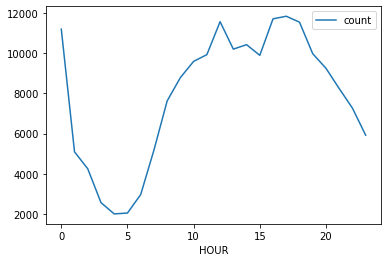

In [16]:
df1.plot.line(x='HOUR', y='INCIDENT_NUMBER')
plt.show()

### Waktu paling rawan terjadi kasus kriminalitas adalah pukul 17

### Analisis Bulan Rawan Kasus Kriminalitas

In [17]:
df2=df.groupby('MONTH').agg(['count']).reset_index()

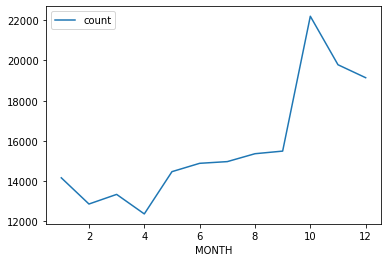

In [18]:
df2.plot.line(x='MONTH', y='INCIDENT_NUMBER')
plt.show()

### Bulan paling rawan terjadi kasus kriminalitas adalah Bulan November

## No.5 Python (Max Point: 5)

-	Tuliskan script python dari query SQL yang telah dilakukan


- Sebutkan distrik mana (A/B/C/D/E, tanpa nomor) yang memiliki angka tindak kriminal yang paling tinggi!

In [19]:
# Mendapatkan Letter Pertama pada kolom District

df['CODE'] = df['DISTRICT'].str[0]

In [20]:
soal_1= df.groupby(by=['CODE']).count()[['INCIDENT_NUMBER']].reset_index()

In [21]:
soal_1.sort_values(by=['INCIDENT_NUMBER'], ascending = False)

,CODE,INCIDENT_NUMBER
1,B,51366
2,C,38708
3,D,36530
0,A,32270
4,E,30209


### Jawabannya adalah District B dengan jumlah Kasus Kriminal 51366

- Sebutkan 3 jenis tindak kriminal yang terjadi pada tahun 2020 namun tidak terjadi di tahun 2019!

In [22]:
a= df[df['YEAR']==2020]
a = a[['OFFENSE_DESCRIPTION']]
a

,OFFENSE_DESCRIPTION
0,INVESTIGATE PERSON
1,INVESTIGATE PERSON
2,FRAUD - CREDIT CARD / ATM FRAUD
3,FRAUD - WELFARE
4,HARASSMENT/ CRIMINAL HARASSMENT
...,...
70889,INVESTIGATE PROPERTY
70890,FRAUD - IMPERSONATION
70891,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...
70892,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...


In [23]:
b = df[df['YEAR']==2019]
b = b[['OFFENSE_DESCRIPTION']]
b

,OFFENSE_DESCRIPTION
0,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...
1,FRAUD - IMPERSONATION
2,FRAUD - IMPERSONATION
3,ASSAULT - SIMPLE
4,FRAUD - FALSE PRETENSE / SCHEME
...,...
19777,FRAUD - CREDIT CARD / ATM FRAUD
19778,VERBAL DISPUTE
19779,VAL - VIOLATION OF AUTO LAW
19780,INVESTIGATE PERSON


In [25]:
Soal_2=a.merge(b, how='outer', indicator=True).loc[lambda x : x ['_merge']=='left_only']

KeyboardInterrupt: 

In [85]:
df.OFFENSE_DESCRIPTION.value_counts()

INVESTIGATE PERSON                       11781
SICK/INJURED/MEDICAL - PERSON            10070
M/V - LEAVING SCENE - PROPERTY DAMAGE     9806
VANDALISM                                 8229
INVESTIGATE PROPERTY                      7876
                                         ...  
Migrated Report - Other Larceny              1
Migrated Report - Weapons Violation          1
Evidence Tracker Incidents                   1
ASSAULT & BATTERY                            1
Justifiable Homicide                         1
Name: OFFENSE_DESCRIPTION, Length: 231, dtype: int64

- Apakah kelompok tindak kriminal yang paling banyak terjadi pada minggu
ke 40-45?


In [26]:
soal_3 = df[(df['MONTH'] == 10) | (df['MONTH'] == 11)]

In [27]:
soal_3 = soal_3.groupby(by=['OFFENSE_DESCRIPTION']).count()[['INCIDENT_NUMBER']].reset_index()

In [28]:
soal_3.sort_values(by=['INCIDENT_NUMBER'], ascending = False).head(1)

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER
89,INVESTIGATE PERSON,2535


### Jawabannya adalah INVESTIGATE PERSON

- Sebutkan nama distrik (A/B/C/D/E, tanpa nomor) yang memiliki jumlah
tindak kriminal terkecil di akhir pekan!

In [29]:
soal_4 = df[(df['DAY_OF_WEEK'] == 'Saturday') | (df['DAY_OF_WEEK'] == 'Sunday')]

In [30]:
soal_4 = soal_4.groupby(by=['CODE']).count()[['INCIDENT_NUMBER']].reset_index()

In [31]:
soal_4.sort_values(by=['INCIDENT_NUMBER'], ascending = True)

,CODE,INCIDENT_NUMBER
4,E,7572
0,A,8818
3,D,9813
2,C,10278
1,B,13500


### Jawabannya adalah DIstrict E

- Sebutkan nama distrik (A/B/C/D/E, tanpa nomor) yang memiliki jumlah
tindak kriminal terbanyak di hari kerja!

In [32]:
soal_5 = df[(df['DAY_OF_WEEK'] != 'Saturday') & (df['DAY_OF_WEEK'] != 'Sunday')]

In [33]:
soal_5 = soal_5.groupby(by=['CODE']).count()[['INCIDENT_NUMBER']].reset_index()

In [34]:
soal_5.sort_values(by=['INCIDENT_NUMBER'], ascending = False)

,CODE,INCIDENT_NUMBER
1,B,37866
2,C,28430
3,D,26717
0,A,23452
4,E,22637


### Jawabannya adalah District B

# No 6.	Machine Learning (Max Point: 25)

-	Lakukan pemodelan dengan salah satu algoritma machine learning untuk dapat memprediksi suatu kejadian kejahatan tertentu terjadi di jam berapa! (Berikan komentar di setiap step pengolahan data dan tampilkan ukuran kebaikan model data test seperti MSE, MAPE, Akurasi, atau yang lainnya) (Output: Notebook)
-	Seorang detektif bernama Shinichi Kudo diberikan tugas untuk melakukan investigasi kejahatan vandalism di district D14. Kejahatan tersebut terjadi di minggu lalu pada hari Kamis bulan Juni. Kira-kira jam berapakah kejahatan itu dilakukan? (Gunakan model yang telah dibuat sebelumnya untuk memprediksi waktu kejadian perkara)(Output: Notebook)


### Cek Dimensi

In [35]:
print('Shape dataset:', df.shape)
print('\nInformasi dataset:')
print(df.info())
print('\nStatistik deskriptif:\n', df.describe())

Shape dataset: (189083, 8)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 189083 entries, 0 to 70893
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   INCIDENT_NUMBER      189083 non-null  object
 1   OFFENSE_DESCRIPTION  189083 non-null  object
 2   DISTRICT             189083 non-null  object
 3   YEAR                 189083 non-null  int64 
 4   MONTH                189083 non-null  int64 
 5   DAY_OF_WEEK          189083 non-null  object
 6   HOUR                 189083 non-null  int64 
 7   CODE                 189083 non-null  object
dtypes: int64(3), object(5)
memory usage: 17.0+ MB
None

Statistik deskriptif:
                 YEAR          MONTH           HOUR
count  189083.000000  189083.000000  189083.000000
mean     2018.851499       7.021784      12.930914
std         0.934731       3.488943       6.357792
min      2018.000000       1.000000       0.000000
25%      

In [36]:
df.head()

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,CODE
0,I192077559,INVESTIGATE PERSON,B3,2018,4,Monday,9,B
1,I192077332,LARCENY ALL OTHERS,E18,2018,3,Tuesday,8,E
2,I192076660,HARASSMENT,E5,2018,10,Wednesday,12,E
3,I192075386,HARASSMENT,A1,2018,4,Monday,8,A
4,I192075335,PROPERTY - MISSING,D4,2018,1,Monday,0,D


In [37]:
print('Shape dataset:', df.shape)

Shape dataset: (189083, 8)


In [38]:
df_corr = df.corr()
print('Korelasi dataset:\n', df.corr())

Korelasi dataset:
            YEAR     MONTH      HOUR
YEAR   1.000000  0.025930 -0.017211
MONTH  0.025930  1.000000 -0.002686
HOUR  -0.017211 -0.002686  1.000000


In [39]:
df.dtypes

INCIDENT_NUMBER        object
OFFENSE_DESCRIPTION    object
DISTRICT               object
YEAR                    int64
MONTH                   int64
DAY_OF_WEEK            object
HOUR                    int64
CODE                   object
dtype: object

## Feature Engineering

In [40]:
df_baru= df.sample(n=10000)

In [42]:
df_baru.head()

,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,CODE
23452,202065567,SICK/INJURED/MEDICAL - PERSON,C11,2020,9,Tuesday,20,C
9910,202083214,INVESTIGATE PROPERTY,B3,2020,11,Tuesday,16,B
40503,I182062121,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,2018,8,Sunday,13,B
1658,202094121,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,2020,12,Thursday,21,B
56606,202019778,DEATH INVESTIGATION,C11,2020,3,Thursday,8,C


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [44]:
x = df_baru.drop(['INCIDENT_NUMBER', 'YEAR', 'HOUR', 'CODE'], axis = 1)
y = df_baru.HOUR

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 4), (2000, 4), (8000,), (2000,))

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [46]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [47]:
from sklearn.compose import ColumnTransformer

In [48]:
x_train.head()

,OFFENSE_DESCRIPTION,DISTRICT,MONTH,DAY_OF_WEEK
51186,PROPERTY - STOLEN THEN RECOVERED,C6,4,Friday
54222,VANDALISM,D4,6,Monday
19757,ASSAULT - SIMPLE,A1,10,Saturday
83620,INVESTIGATE PERSON,A1,3,Saturday
10449,DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE,B2,11,Monday


In [49]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['MONTH']),
    ('categoric', categorical_pipeline, ['OFFENSE_DESCRIPTION', 'DISTRICT','DAY_OF_WEEK'])
])

## Pemodelan

### KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [52]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MONTH']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['OFFENSE_DESCRIPTION',
               

In [53]:
pipeline.score(x_test, y_test)

-0.14824473577623243

### Tuning Model

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameter = {
    "algo__n_neighbors": range(1, 51, 2),
    "algo__weights": ["uniform","distance"],
    "algo__p": [1, 2]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['MONTH']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                           

In [56]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,param_algo__p,param_algo__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
70,0.146666,0.008496,1.243331,0.018861,35,2,uniform,"{'algo__n_neighbors': 35, 'algo__p': 2, 'algo_...",-0.010793,-0.007186,-0.012965,-0.010315,0.002384,1
78,0.146665,0.006235,1.301666,0.027185,39,2,uniform,"{'algo__n_neighbors': 39, 'algo__p': 2, 'algo_...",-0.008669,-0.009265,-0.013654,-0.010529,0.002223,2
98,0.148331,0.004718,1.268332,0.022484,49,2,uniform,"{'algo__n_neighbors': 49, 'algo__p': 2, 'algo_...",-0.008334,-0.008922,-0.014453,-0.010570,0.002756,3
96,0.174999,0.010799,1.701660,0.030640,49,1,uniform,"{'algo__n_neighbors': 49, 'algo__p': 1, 'algo_...",-0.007373,-0.010416,-0.014449,-0.010746,0.002898,4
82,0.163334,0.006237,1.204996,0.042427,41,2,uniform,"{'algo__n_neighbors': 41, 'algo__p': 2, 'algo_...",-0.008505,-0.009733,-0.014001,-0.010747,0.002355,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.138331,0.008496,1.358329,0.036589,3,1,distance,"{'algo__n_neighbors': 3, 'algo__p': 1, 'algo__...",-0.482440,-0.524015,-0.485363,-0.497272,0.018947,96
1,0.151663,0.011784,1.231666,0.015454,1,1,distance,"{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...",-0.973951,-0.995142,-0.999071,-0.989388,0.011033,97
0,0.161664,0.011787,1.322977,0.028068,1,1,uniform,"{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...",-0.973951,-0.995142,-0.999071,-0.989388,0.011033,97
3,0.138331,0.002356,1.078332,0.039655,1,2,distance,"{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...",-0.968726,-1.004442,-0.999163,-0.990777,0.015741,99


In [57]:
model.best_params_

{'algo__n_neighbors': 35, 'algo__p': 2, 'algo__weights': 'uniform'}

In [58]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.0484576852611166, -0.018875961556247267)

### DTR Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

pipeline.fit(x_train, y_train)

pipeline.score(x_test, y_test)

-0.8914064117309726

### Tuning Model

In [63]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameter = {'algo__criterion': ['mse', 'mae']}
    

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  7.3min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['MONTH']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                           

In [66]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.511664,0.024609,0.035000,0.007071,mse,{'algo__criterion': 'mse'},-0.895359,-0.918752,-0.809427,-0.874513,0.047003,1
1,238.579091,37.647213,0.030013,0.004069,mae,{'algo__criterion': 'mae'},-0.873287,-0.964211,-0.857943,-0.898480,0.046899,2


In [67]:
model.best_params_

{'algo__criterion': 'mse'}

In [68]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8853786281683682, -0.8692626724013046)

## Prediction

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [76]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MONTH']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['OFFENSE_DESCRIPTION',
               

In [53]:
pipeline.score(x_test, y_test)

-0.14824473577623243

### Tuning Model

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameter = {
    "algo__n_neighbors": range(1, 51, 2),
    "algo__weights": ["uniform","distance"],
    "algo__p": [1, 2]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['MONTH']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                           

In [79]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,param_algo__p,param_algo__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
70,0.304670,0.042085,1.582328,0.184710,35,2,uniform,"{'algo__n_neighbors': 35, 'algo__p': 2, 'algo_...",-0.010793,-0.007186,-0.012965,-0.010315,0.002384,1
78,0.172338,0.016820,1.440329,0.131834,39,2,uniform,"{'algo__n_neighbors': 39, 'algo__p': 2, 'algo_...",-0.008669,-0.009265,-0.013654,-0.010529,0.002223,2
98,0.204003,0.053071,1.550329,0.249671,49,2,uniform,"{'algo__n_neighbors': 49, 'algo__p': 2, 'algo_...",-0.008334,-0.008922,-0.014453,-0.010570,0.002756,3
96,0.155001,0.009416,1.610663,0.038964,49,1,uniform,"{'algo__n_neighbors': 49, 'algo__p': 1, 'algo_...",-0.007373,-0.010416,-0.014449,-0.010746,0.002898,4
82,0.194663,0.024141,1.770666,0.036712,41,2,uniform,"{'algo__n_neighbors': 41, 'algo__p': 2, 'algo_...",-0.008505,-0.009733,-0.014001,-0.010747,0.002355,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.168669,0.033823,1.723667,0.050968,3,1,distance,"{'algo__n_neighbors': 3, 'algo__p': 1, 'algo__...",-0.482440,-0.524015,-0.485363,-0.497272,0.018947,96
1,0.198667,0.014841,2.058994,0.112184,1,1,distance,"{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...",-0.973951,-0.995142,-0.999071,-0.989388,0.011033,97
0,0.173663,0.013573,1.828998,0.114300,1,1,uniform,"{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...",-0.973951,-0.995142,-0.999071,-0.989388,0.011033,97
3,0.339333,0.127412,2.188998,0.263895,1,2,distance,"{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...",-0.968726,-1.004442,-0.999163,-0.990777,0.015741,99


In [80]:
model.best_params_

{'algo__n_neighbors': 35, 'algo__p': 2, 'algo__weights': 'uniform'}

In [81]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.0484576852611166, -0.018875961556247267)

# Prediction

In [82]:
x_train

,OFFENSE_DESCRIPTION,DISTRICT,MONTH,DAY_OF_WEEK
51186,PROPERTY - STOLEN THEN RECOVERED,C6,4,Friday
54222,VANDALISM,D4,6,Monday
19757,ASSAULT - SIMPLE,A1,10,Saturday
83620,INVESTIGATE PERSON,A1,3,Saturday
10449,DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE,B2,11,Monday
...,...,...,...,...
69774,THREATS TO DO BODILY HARM,B2,1,Tuesday
24629,SICK/INJURED/MEDICAL - PERSON,C6,9,Thursday
55916,M/V - LEAVING SCENE - PROPERTY DAMAGE,B3,3,Sunday
13340,VANDALISM,B2,10,Sunday


In [83]:
data = [['VANDALISM', 'D14', 6, 'Thrusday']]

x_pred = pd.DataFrame(data, columns=x.columns)
x_pred

,OFFENSE_DESCRIPTION,DISTRICT,MONTH,DAY_OF_WEEK
0,VANDALISM,D14,6,Thrusday


In [84]:
model.predict(x_pred)

array([13.57142857])